In [152]:
#=====================================================
# Nome:   Diego Andrés Méndez
# N. USP: 7991531
#=====================================================

# MAC0460/5832 - Lista 4: SVM - MNIST

### Data de Entrega: 23h55m do dia XX/12/2018

##### Classificação de dígitos
Os dataset para esta tarefa é uma adaptação do disponível na competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train_svm.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, e apenas os dígitos 5 e 6 foram mantidos. Cada linha (amostra) do arquivo contém 257 colunas: a primeira informa o label da amostra (0 para o dígito 5, 1 para o dígito 6) e as outras 256 são os valores dos pixels da imagem (16 x 16) que representa o dígito.

Note que esse dataset difere do usado no EP3: as imagens sofreram pequenas rotações e translações aleatórias, além de terem sido escalonadas para o tamanho 16x16. Veja também que pode ser necessário realizar algum tipo de normalização para realizar um treinamento efetivo com SVM. Para auxiliar na normalização dos dados, consultem o seguinte link: http://scikit-learn.org/stable/modules/preprocessing.html. 

Q1. Use SVM para classificar os dígitos 5 e 6. Utilize as funções do scikit learn (http://scikit-learn.org/, http://scikit-learn.org/stable/modules/svm.html) para realizar o treinamento.

Teste os kernels linear e RBF da seguinte maneira:
1. Escolha aleatoriamente 932 amostras para formarem o conjunto de teste.
2. Com as 7000 amostras restantes, utilize validação cruzada (com número de folds K = 5) para escolher os parâmetros do seu classificador, isto é: C (peso da *soft margin*) para o kernel linear; C e gamma para o kernel RBF.
3. Plote a curva experimental de aprendizado para o melhor SVM com kernel linear e o melhor SVM com kernel RBF escolhidos por validação cruzada. Use as 932 amostras do conjunto de teste para estimar $E_{out}$. Comente sobre o resultado.

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = np.genfromtxt('data/train_svm.csv', delimiter=',')
print(data.shape)

(7932, 257)


Label:  1


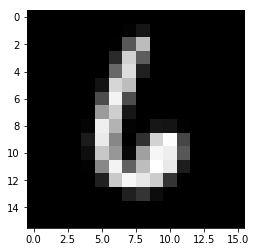

Label:  0


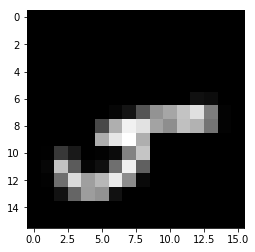

Label:  1


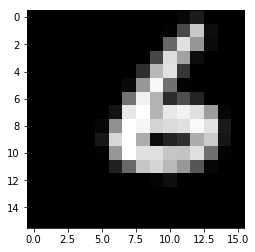

Label:  0


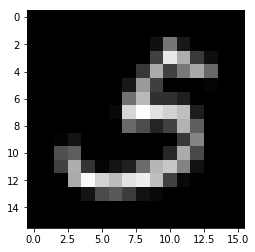

In [97]:
sample = data[0]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[1]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[20]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[25]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

In [98]:
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix
import pandas as pd
from IPython.display import display

In [99]:
x=np.array([np.array(sample[1:]) for sample in data])
y=np.array([sample[0] for sample in data])
x=preprocessing.scale(x)
x_rand, y_rand = shuffle(x, y, random_state=0)
size_train_val=7000
x_test=x_rand[size_train_val:]
y_test=y_rand[size_train_val:]
x_train_val=x_rand[:size_train_val]
y_train_val=y_rand[:size_train_val]

k=5

In [100]:
#Kernel linear

df_linear=pd.DataFrame(columns=['log_2(C)','Accuracy'])

for i in range(k):
    print('Validation '+str(i+1))
    
    x_train=np.vstack((x_train_val[:i*round(size_train_val/k)],x_train_val[(i+1)*round(size_train_val/k):]))
    y_train=np.append(y_train_val[:i*round(size_train_val/k)],y_train_val[(i+1)*round(size_train_val/k):])
    x_eval=x_train_val[i*round(size_train_val/k):(i+1)*round(size_train_val/k)]
    y_eval=y_train_val[i*round(size_train_val/k):(i+1)*round(size_train_val/k)]
    
    for j in range(-12,3):
        c=2**(j)
        svm_linear=svm.SVC(kernel='linear',C=c,cache_size=1000)
        svm_linear.fit(x_train,y_train)
        df_linear.loc[len(df_linear),:]=[j,svm_linear.score(x_eval,y_eval)]
    
df_linear_final=df_linear.groupby(['log_2(C)'],as_index=False).agg({'Accuracy':lambda x:np.mean(x)})
display(df_linear_final)

c_linear_opt=2.**df_linear_final.set_index('log_2(C)')['Accuracy'].idxmax()
acc_linear_max=df_linear_final['Accuracy'].max()
print('O melhor C é '+str(c_linear_opt)+' para o kernel linear, com Accuracy de '+str(acc_linear_max)+'.')

Validation 1
Validation 2
Validation 3
Validation 4
Validation 5


,log_2(C),Accuracy
0,-12,0.931714
1,-11,0.936857
2,-10,0.938857
3,-9,0.938714
4,-8,0.939714
5,-7,0.940143
6,-6,0.940000
7,-5,0.940714
8,-4,0.938714
9,-3,0.938286


O melhor C é 0.03125 para o kernel linear, com Accuracy de 0.9407142857142856.


In [104]:
#Kernel RBF

df_RBF=pd.DataFrame(columns=['log_2(C)','log_2(gamma)','Accuracy'])

for i in range(k):
    print('Validation '+str(i+1))
    
    x_train=np.vstack((x_train_val[:i*round(size_train_val/k)],x_train_val[(i+1)*round(size_train_val/k):]))
    y_train=np.append(y_train_val[:i*round(size_train_val/k)],y_train_val[(i+1)*round(size_train_val/k):])
    x_eval=x_train_val[i*round(size_train_val/k):(i+1)*round(size_train_val/k)]
    y_eval=y_train_val[i*round(size_train_val/k):(i+1)*round(size_train_val/k)]
    
    for j in range(-4,7):
        c=2**(j)
        for l in range(-11,-4):
            gamma=2**(l)
            svm_RBF=svm.SVC(kernel='rbf',C=c,gamma=gamma,cache_size=1000)
            svm_RBF.fit(x_train,y_train)
            df_RBF.loc[len(df_RBF),:]=[j,l,svm_RBF.score(x_eval,y_eval)]
    
df_RBF_final=df_RBF.groupby(['log_2(C)','log_2(gamma)'],as_index=False).agg({'Accuracy':lambda x:np.mean(x)})
display(df_RBF_final)

c_RBF_opt=2.**df_RBF_final.set_index('log_2(C)')['Accuracy'].idxmax()
gamma_RBF_opt=2.**df_RBF_final.set_index('log_2(gamma)')['Accuracy'].idxmax()
acc_RBF_max=df_RBF_final['Accuracy'].max()
print('O melhor C é '+str(c_RBF_opt)+' e o melhor gamma é '+str(gamma_RBF_opt)+' para o kernel RBF, com Accuracy de '+str(acc_RBF_max)+'.')

Validation 1
Validation 2
Validation 3
Validation 4
Validation 5


,log_2(C),log_2(gamma),Accuracy
0,-4,-11,0.915429
1,-4,-10,0.929000
2,-4,-9,0.938286
3,-4,-8,0.943714
4,-4,-7,0.923143
5,-4,-6,0.858857
6,-4,-5,0.545286
7,-3,-11,0.928714
8,-3,-10,0.938286
9,-3,-9,0.948571


O melhor C é 16.0 e o melhor gamma é 0.001953125 para o kernel RBF, com Accuracy de 0.9805714285714286.


### Medindo as curvas de aprendizado para os melhores parâmetros encontrados

In [144]:
#Kernel linear
df_linear_learning=pd.DataFrame(columns=['Training samples','E_in','E_out'])

x_train=x_train_val
y_train=y_train_val

c=0.03125

for i in range(round(size_train_val/10)):
    svm_linear=svm.SVC(kernel='linear',C=c,cache_size=1000)
    svm_linear.fit(x_train[:(i+1)*10],y_train[:(i+1)*10])
    df_linear_learning.loc[len(df_linear_learning),:]=[10*(i+1),1-svm_linear.score(x_train[:(i+1)*10],y_train[:(i+1)*10]),1-svm_linear.score(x_test,y_test)]


In [135]:
#Kernel RBF
df_RBF_learning=pd.DataFrame(columns=['Training samples','E_in','E_out'])

x_train=x_train_val
y_train=y_train_val

c=16.0
gamma=0.001953125

for i in range(round(size_train_val/10)):
    svm_RBF=svm.SVC(kernel='rbf',C=c,gamma=gamma,cache_size=1000)
    svm_RBF.fit(x_train[:(i+1)*10],y_train[:(i+1)*10])
    df_RBF_learning.loc[len(df_RBF_learning),:]=[10*(i+1),1-svm_RBF.score(x_train[:(i+1)*10],y_train[:(i+1)*10]),1-svm_RBF.score(x_test,y_test)]


In [145]:
df_linear_learning

,Training samples,E_in,E_out
0,10,0,0.438841
1,20,0,0.274678
2,30,0,0.238197
3,40,0,0.213519
4,50,0,0.193133
5,60,0,0.18133
6,70,0,0.156652
7,80,0,0.167382
8,90,0,0.162017
9,100,0,0.166309


In [137]:
df_RBF_learning

,Training samples,E_in,E_out
0,10,0,0.437768
1,20,0,0.281116
2,30,0,0.225322
3,40,0,0.200644
4,50,0,0.208155
5,60,0,0.177039
6,70,0,0.179185
7,80,0,0.175966
8,90,0,0.167382
9,100,0,0.155579


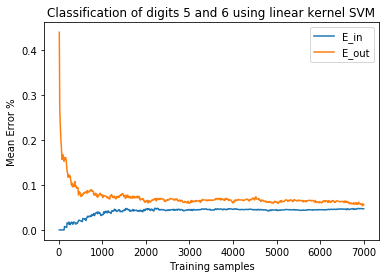

In [146]:
#Kernel linear
plt.plot(df_linear_learning['Training samples'],df_linear_learning['E_in'])
plt.plot(df_linear_learning['Training samples'],df_linear_learning['E_out'])
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Classification of digits 5 and 6 using linear kernel SVM')
plt.legend(['E_in', 'E_out'], loc='upper right')
plt.show()

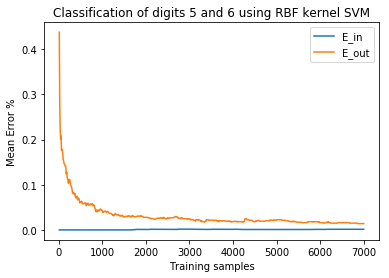

In [143]:
#Kernel RBF
plt.plot(df_RBF_learning['Training samples'],df_RBF_learning['E_in'])
plt.plot(df_RBF_learning['Training samples'],df_RBF_learning['E_out'])
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Classification of digits 5 and 6 using RBF kernel SVM')
plt.legend(['E_in', 'E_out'], loc='upper right')
plt.show()

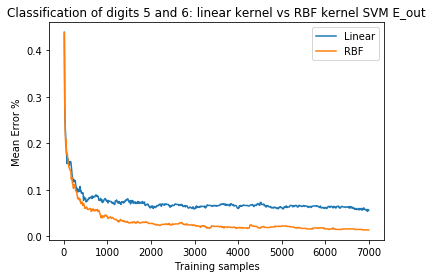

In [151]:
#E_out do kernel linear e kernel RBF
plt.plot(df_linear_learning['Training samples'],df_linear_learning['E_out'])
plt.plot(df_RBF_learning['Training samples'],df_RBF_learning['E_out'])
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Classification of digits 5 and 6: linear kernel vs RBF kernel SVM E_out')
plt.legend(['Linear', 'RBF'], loc='upper right')
plt.show()

In [ ]:
#Concluo que, para este experimento, o kernel RBF apresentou melhores resultados,
#com um E_out de 0.0139485, contra um E_out de 0.055794 do kernel linear.

#Isso provavelmente occorreu por dois faotres
#1) O Kernel RBF também apresentou menor E_in.
#2) Apesar do Kernel RBF proporcionar um espaço de funções com dimensão VC maior, a amostra de treinamento
#   era grande o suficiente para que fosse possível generalizar o aprendizado para a amostra de teste.